## Previous Notebook in this Project: [03_Preprocessing_and_Training](https://github.com/omi-singh17/Cardio-Disease-Prediction/blob/main/03%20Preprocessing%20and%20Training/03_Preprocessing_and_Training.ipynb)


# Imports

In [95]:
# imports
#base
import pandas as pd
import numpy as np


#feature engineering

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

#pipeline
import pickle
import cloudpickle

# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay


#visualization
import matplotlib.pyplot as plt

import warnings


# Data Load

In [96]:
X = pd.read_csv('../Post Preprocessing/X.csv')

In [97]:
y = pd.read_csv('../Post Preprocessing/y.csv')

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# Importing Preprocessing Pipeline

In [99]:
preprocessing_pipeline = pickle.load(open('../Post Preprocessing/preprocessing_pipeline', 'rb'))

In [100]:
X_train.head().T

,11421,2649,14702,20630,20774
gender,1.0,2.0,1.0,2.0,2.0
age,58.0,54.0,80.0,65.0,24.0
ethnicity,Non-Hispanic White,Non-Hispanic White,Non-Hispanic White,Non-Hispanic White,Non-Hispanic White
income,"65,000 to 100,000","35,000 to < 65,000","20,000 to < 35,000","20,000 to < 35,000","< 20,000"
household_size,2.0,3.0,2.0,3.0,3.0
marital_status,Married,Married,Widowed,Married,Married
bp_regularity,1.0,1.0,1.0,1.0,1.0
systolic_bp,138.0,122.0,NaN,128.0,108.0
diastolic_bp,94.0,72.0,NaN,0.0,80.0
bmi,33.23,31.55,23.67,40.6,27.3


In [101]:
preprocessing_pipeline

Pipeline(steps=[('gender_grouped_mode_and_median_imputer', imputer()),
                ('ordinal_and_onehot_encoder', encoder()),
                ('standard_scaler',
                 <__main__.scaler object at 0x000001E291694850>)])

In [102]:
X_train_scaled = preprocessing_pipeline.fit_transform(X_train)

In [103]:
X_train_scaled.head().T

,0,1,2,3,4
gender,-1.035002,0.966181,-1.035002,0.966181,0.966181
age,0.478358,0.256886,1.696456,0.865934,-1.404157
income,1.050456,0.314348,-0.421759,-0.421759,-1.157866
household_size,-0.702410,-0.106857,-0.702410,-0.106857,-0.106857
bp_regularity,-0.164303,-0.164303,-0.164303,-0.164303,-0.164303
systolic_bp,0.770005,-0.118809,-0.007707,0.214496,-0.896520
diastolic_bp,1.945523,0.159853,0.159853,-5.684161,0.809187
bmi,0.620986,0.372786,-0.791392,1.709818,-0.255102
waist_size,1.154963,-0.305283,0.037164,2.169381,-0.337589
good_cholesterol,-0.762502,0.065140,-1.781139,0.192470,0.638124


In [104]:
#X_test_scaled = preprocessing_pipeline.transform(X_test)

# Custom Evaluation Metrics

In [105]:
# Create a custom evaluation metric to quickly note  of actual target vs predicted target values

def recall_score_plot_ (target_test, target_predicted, Model='Classifier'):
    # Calculate Recall
    recall_ = round(recall_score(target_test, target_predicted, average=None)[1],2)
    print (f'\033[1m {Model} Recall score: {recall_} \033[0m')
   
    #Calculate F1-score
    f1_score_ = round(f1_score(target_test, target_predicted),2)
    print (f'\033[1m {Model} F1_score: {f1_score_} \033[0m')

    #plot precision_recall curve
    display = PrecisionRecallDisplay.from_predictions(
    target_test, target_predicted, name=Model, plot_chance_level=True)
    _ = display.ax_.set_title(f'2-class {Model} Precision-Recall curve')
    
    #plot confustion matrix
    display_cm = ConfusionMatrixDisplay.from_predictions(target_test, target_predicted,  
                                    display_labels = ['No Heart Issue', 'Heart Issue'], cmap = 'PuBu')
    ax.set_xticklabels(labels = ['No Heart Issue', 'Heart Issue'], fontsize = 8)
    ax.set_yticklabels(labels = ['No Heart Issue', 'Heart Issue'], fontsize = 8)

    _ = display_cm.ax_.set_title(f'2-class {Model} Confusion Matrix')
    plt.show()
    
    
    #print classification metric
    print(classification_report(target_test, target_predicted)) 

# Model Evaluations

## 1.a Basic Logistic Regression

In [106]:
logit_model = LogisticRegression(random_state=0)

In [107]:
logit_model.fit(X_train_scaled, y_train.values.ravel())

LogisticRegression(random_state=0)

In [108]:
 y_predict_train = logit_model.predict(X_train_scaled)

In [109]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     21172
         1.0       0.53      0.15      0.24      2643

    accuracy                           0.89     23815
   macro avg       0.72      0.57      0.59     23815
weighted avg       0.86      0.89      0.86     23815



In [110]:
y_predict_test = logit_model.predict(X_test_scaled)

In [111]:
print(f'Accuracy on training data: {accuracy_score(logit_model.predict(X_train_scaled), y_train.values.ravel()):.2f}')

Accuracy on training data: 0.89


In [112]:
print(f'Accuracy on test data: {accuracy_score(logit_model.predict(X_test_scaled), y_test.values.ravel()):.2f}')

Accuracy on test data: 0.90


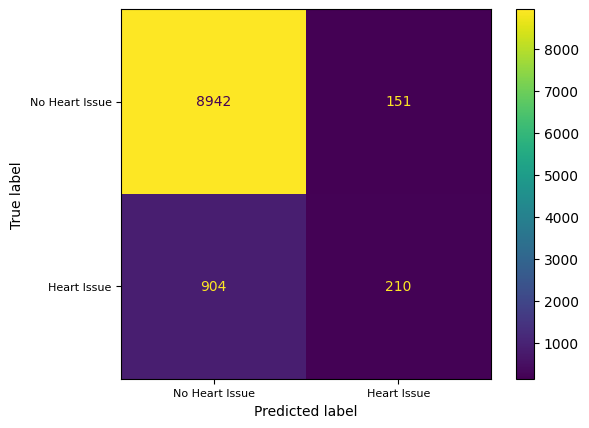

In [113]:
cm = confusion_matrix(y_test, y_predict_test, labels = logit_model.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['No Heart Issue', 'Heart Issue'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['No Heart Issue', 'Heart Issue'], fontsize = 8)
ax.set_yticklabels(labels = ['No Heart Issue', 'Heart Issue'], fontsize = 8)
display_cm.plot(ax = ax)
plt.show()

while the overall accuracy looks high we see that basic logistic regression model classifies heart issues as No heart issue quite frequently, with a recall score of 210/ (210 + 904) = 0.19


In [114]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      9093
         1.0       0.58      0.19      0.28      1114

    accuracy                           0.90     10207
   macro avg       0.74      0.59      0.61     10207
weighted avg       0.87      0.90      0.87     10207



In [115]:
# Our data is quite imbalanced 
y_train.value_counts()
#y_train.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

heart_issue
0.0            21172
1.0             2643
Name: count, dtype: int64

In [116]:
round(recall_score(y_test, y_predict_test, average=None)[1],2)

0.19

In [117]:
round(recall_score(y_test, y_predict_test, average='binary'),2)

0.19

In [118]:
#print(recall_score_(y_test, y_predict_test))

# 1.b Logistic Regression with GridSearchCV

In [119]:
#initiate model using balanced class weight as our dataset is imbalanced
logistic_model = LogisticRegression(max_iter = 500, solver = 'liblinear', class_weight = 'balanced', random_state= 0)

#penalty hyperparameter 
penalty = ['l1', 'l2']
#canidate regularization hyperparameter
C =np.logspace(0, 4, 10)
#hyperparameters dictionary
hyperparameters = dict(penalty=penalty, C=C)

#create grid search 
gridsearch_lr = GridSearchCV(logistic_model, hyperparameters, cv=5, verbose=0, scoring = 'recall')
#fit grid search
best_logistic_model = gridsearch_lr.fit(X_train_scaled, y_train.values.ravel())

#show best model params
print(best_logistic_model.best_estimator_)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=0,
                   solver='liblinear')


In [120]:
#check mean test scres of cross validation
gridsearch_lr.cv_results_["mean_test_score"]

array([0.8078006 , 0.80817867, 0.80704445, 0.80742324, 0.80742324,
       0.80742252, 0.80742252, 0.80780131, 0.80742252, 0.80704445,
       0.80742252, 0.80742324, 0.80704445, 0.80704445, 0.80704445,
       0.80704445, 0.80704445, 0.80704445, 0.80704445, 0.80704445])

In [121]:
print(best_logistic_model.best_params_)

{'C': 1.0, 'penalty': 'l2'}


In [122]:
print(best_logistic_model.best_score_)

#The recall score is siginificantly better than the base logistic model

0.8081786675832046


# 2. Support Vector Machine with GridSearchCV

In [123]:
#initiate model using balanced class weight as our dataset is imbalanced
svc_model = SVC(class_weight = 'balanced', random_state = 0)

#param_grid
param_grid_svc = [
  {'kernel': ['linear']},
  {'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

#create grid search 
gridsearch_svc = GridSearchCV(svc_model, param_grid_svc, cv=5, verbose=0, scoring = 'recall')
#fit grid search
best_svc_model = gridsearch_svc.fit(X_train_scaled, y_train.values.ravel())

#show best model params
print(best_svc_model.best_estimator_)

SVC(class_weight='balanced', kernel='linear', random_state=0)


In [124]:
print(best_svc_model.best_params_)

{'kernel': 'linear'}


In [125]:
print(best_svc_model.best_score_)

#The recall score is an improvement from best_logistic_model

0.8255835767886808


# 3.a Random Forest

In [126]:
#initiate model using balanced class weight as our dataset is imbalanced
random_model = RandomForestClassifier(class_weight = 'balanced', random_state = 0)

#param_grid
param_grid_rf = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9],
    #'min_samples_leaf': [1,2,3],  #commented out for processing speed and since results give default as best
    'max_leaf_nodes': [3, 6, 9], 
} 

#create grid search 
gridsearch_rf = GridSearchCV(random_model, param_grid_rf, cv=5, verbose=0, scoring = 'recall', return_train_score=True)

#gridsearch = GridSearchCV(random_model, param_grid_rf, cv=5, verbose=0, scoring = 'balanced_accuracy_score') #alternate scoring metrics

#fit grid search
best_rf_model = gridsearch_rf.fit(X_train_scaled, y_train.values.ravel())

#show best model params
print(best_rf_model.best_estimator_)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=3,
                       n_estimators=25, random_state=0)


In [127]:
print(best_rf_model.best_params_)

{'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 3, 'n_estimators': 25}


In [128]:
print(best_rf_model.best_score_)

#The recall score shows further improvement over SVC model

0.8581106432949535


In [129]:
#print(classification_report(y_test, y_rf_predict_test))

# 3.b LightGBM Boosting Classifier

In [130]:
#initiate model 
lgb_model = lgb.LGBMClassifier(random_state = 0)

#param_grid
param_grid_lgb = {
'boosting_type': ['gbdt','rf'],
'objective': ['binary'],
'scale_pos_weight': [(21172 / 2643)], #(no. of negative samples / number of positive samples)
'num_leaves':[31, 63, 127],
'max_depth':[-1, 3, 5],
'learning_rate':[0.1, 0.01, 1]
#,'n_estimators': [100, 250, 500] commented out for processing speed and lack of impact on score 
    
}

#create grid search 
gridsearch_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=5, verbose=0, scoring = 'recall')

#fit grid search
best_lgb_model = gridsearch_lgb.fit(X_train_scaled, y_train.values.ravel())



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111012 -> initscore=-2.080446
[LightGBM] [Info] Start training from score -2.080446
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1569
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111012 -> initscore=-2.080446
[LightGBM] [Info] Start training from score -2.080446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1570
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1569
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111012 -> initscore=-2.080446
[LightGBM] [Info] Start training from score -2.080446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111012 -> initscore=-2.080446
[LightGBM] [Info] Start training from score -2.080446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000910 seconds.
You can set `force_row_wise=true` to remove the overhead

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1570
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1569
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111012 -> initscore=-2.080446
[LightGBM] [Info] Start training from score -2.080446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1569
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111012 -> initscore=-2.080446
[LightGBM] [Info] Start training from score -2.080446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1570
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111012 -> initscore=-2.080446
[LightGBM] [Info] Start training from score -2.080446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1570
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1569
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111012 -> initscore=-2.080446
[LightGBM] [Info] Start training from score -2.080446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111012 -> initscore=-2.080446
[LightGBM] [Info] Start training from score -2.080446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1570
[LightGBM] [Info] Number of data points in the train set: 19052, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110959 -> initscore=-2.080978
[LightGBM] [Info] Start training from score -2.080978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Nu

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Nu

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2114, number of negative: 16938
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2115, number of negative: 16937
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Nu

C:\Users\omi17\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omi17\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omi17\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1187, in fit
    super().fit(
  File "C:\Users\omi17\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 885, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\omi17\anaconda3\Lib\site-packages\ligh

In [131]:
#show best model params
print(best_lgb_model.best_estimator_)

LGBMClassifier(max_depth=3, objective='binary', random_state=0,
               scale_pos_weight=8.01059402194476)


In [132]:
print(best_lgb_model.best_params_)

{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 3, 'num_leaves': 31, 'objective': 'binary', 'scale_pos_weight': 8.01059402194476}


In [133]:
print(best_lgb_model.best_score_)

0.8123403219338947


### A note on Sampling techniques:

Undersampling techniques can be used when we have large data (tens of thousands of records for the less dominant class is generally enough).

As this isn't the case for us, we can go for Oversampling techniques which are better suited for a relatively smaller dataset, a few hundred or a few thousand records of the rarer class. Similar effect to Oversampling can be achieved using weighting techniques present in many classification algorithms. We have made use of these weighting techniques in our classifiers above to handle imbalanced data.

(_Source: Practical Statistics for Data Scientists, O'Reilly book_)

# Model Selection

In [134]:
#Compare best scoring hyperparameters for the best model so far
cv_results_rf = pd.DataFrame(gridsearch_rf.cv_results_)

best_row = cv_results_rf[cv_results_rf["rank_test_score"] == 1]
#print(best_row)
print(best_row[['rank_test_score','param_max_depth','param_max_features', 'param_max_leaf_nodes'
                , 'param_n_estimators', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']])


    rank_test_score param_max_depth param_max_features param_max_leaf_nodes  \
0                 1               3               sqrt                    3   
36                1               6               sqrt                    3   
72                1               9               sqrt                    3   

   param_n_estimators  mean_test_score  std_test_score  mean_train_score  \
0                  25         0.858111        0.013429          0.860671   
36                 25         0.858111        0.013429          0.860671   
72                 25         0.858111        0.013429          0.860671   

    std_train_score  
0          0.008161  
36         0.008161  
72         0.008161  


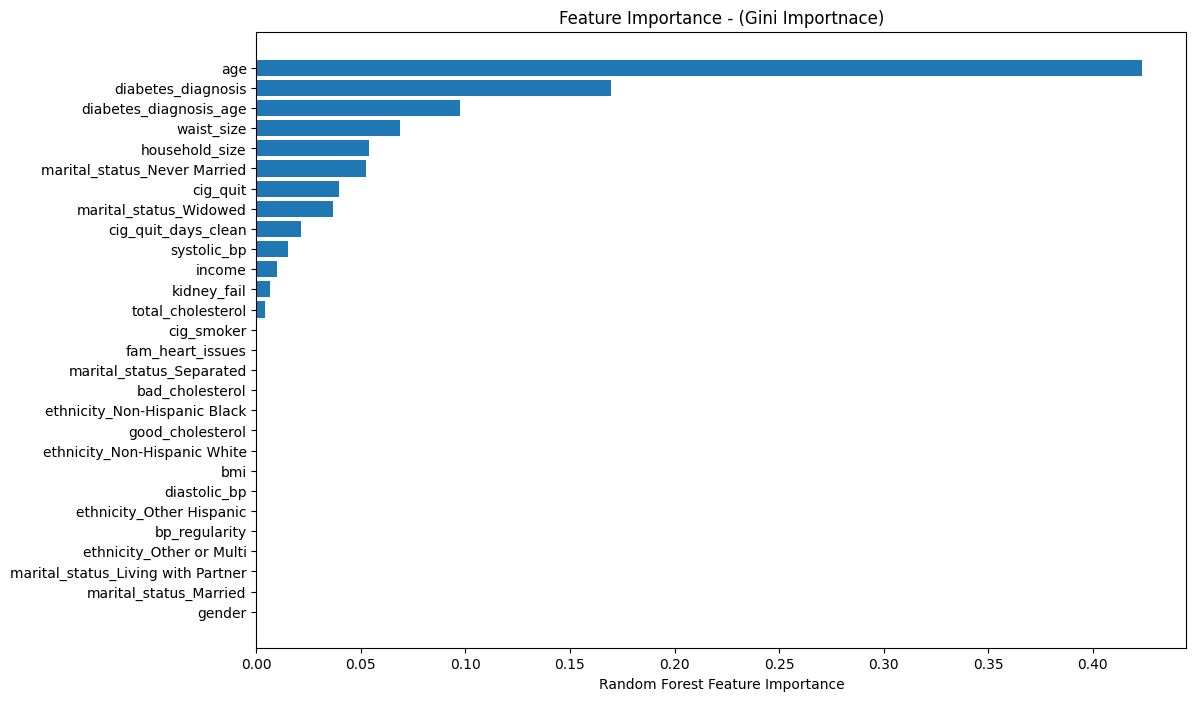

In [135]:
plt.figure(figsize = (12,8))
#Create a Random model with best params
random_model_ = RandomForestClassifier(max_depth = 3, max_features = 'sqrt', min_samples_leaf = 1,
                                       max_leaf_nodes = 3, n_estimators = 25, class_weight = 'balanced', random_state = 0)
best_rf_model_ = random_model_.fit(X_train_scaled, y_train.values.ravel())

#calculate feature importances
importances = best_rf_model_.feature_importances_

#sort feature importances in descending order
sorted_idx = best_rf_model_.feature_importances_.argsort()
plt.barh(X_train_scaled.columns[sorted_idx], best_rf_model_.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#title
plt.title('Feature Importance - (Gini Importnace)')

plt.show()

# Final Pipeline - Combining Preprocessing Pipeline with Classifier

In [136]:
#creating new split set for final pipeline fit and predict 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [137]:
rf_model_pipeline = Pipeline(steps=[
    (preprocessing_pipeline.steps[0])
    , (preprocessing_pipeline.steps[1])
    , (preprocessing_pipeline.steps[2])
   ,  ('classifier',  RandomForestClassifier(max_depth = 3, max_features = 'sqrt', min_samples_leaf = 1,
                                       max_leaf_nodes = 3, n_estimators = 25, class_weight = 'balanced', random_state = 0))
    ])

In [138]:
rf_model_pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('gender_grouped_mode_and_median_imputer', imputer()),
                ('ordinal_and_onehot_encoder', encoder()),
                ('standard_scaler',
                 <__main__.scaler object at 0x000001E291694850>),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        max_leaf_nodes=3, n_estimators=25,
                                        random_state=0))])

In [139]:
y_rf_predict_test = rf_model_pipeline.predict(X_test)

 Random Forest Recall score: 0.85 
 Random Forest F1_score: 0.36 


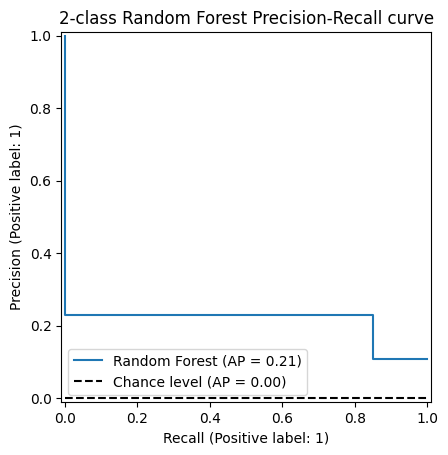

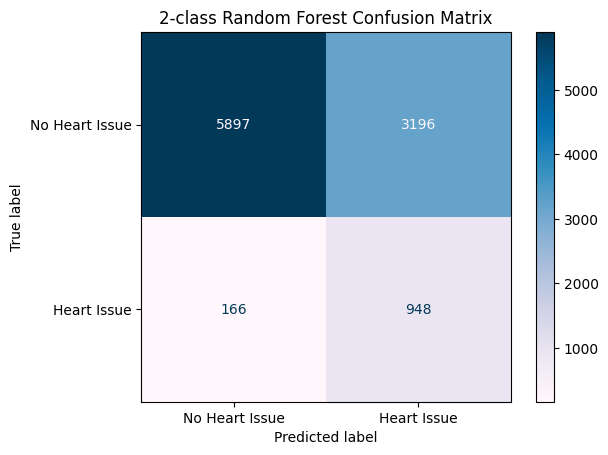

              precision    recall  f1-score   support

         0.0       0.97      0.65      0.78      9093
         1.0       0.23      0.85      0.36      1114

    accuracy                           0.67     10207
   macro avg       0.60      0.75      0.57     10207
weighted avg       0.89      0.67      0.73     10207



In [140]:
#Using Custom Evaluation Metric to note key metrics on the test set
recall_score_plot_(y_test, y_rf_predict_test, 'Random Forest')

# Saving the Final model

In [141]:
# training final model on entire dataset to handle new data, will not be used for evaluation on test data at this point
final_model = Pipeline(steps=[
    (preprocessing_pipeline.steps[0])
    , (preprocessing_pipeline.steps[1])
    , (preprocessing_pipeline.steps[2])
   ,  ('classifier',  RandomForestClassifier(max_depth = 3, max_features = 'sqrt', min_samples_leaf = 1,
                                       max_leaf_nodes = 3, n_estimators = 25, class_weight = 'balanced', random_state = 0))
    ])

final_model.fit(X, y.values.ravel())

#saving the final model 
cloudpickle.dump(rf_model_pipeline, open('../Final Model/final_model', 'wb'))